In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
""" 데이터 셋을 불러오고 입력 변수와 목표 변수로
    나누고 training set 과 test set 으로 나누는 작업 """

dataset = pd.read_csv('../data/MNIST_preprocessed.csv', sep=',', header=None).values

X = dataset[:, 0:784]
Y = dataset[:, 784:]

X_train, X_test = X[0:250,], X[250:,]
Y_train, Y_test = Y[0:250,], Y[250:,]

In [3]:
# 시그모이드 함수 및 시그모이드 미분 함수
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [4]:
# 신경망의 가중치와 편향을 초기화 해주는 함수(다른 파일에서 이미 함!)

def initialize_parameters(neurons_per_layer):
    L = len(neurons_per_layer) - 1 
    parameters = {}
    
    for l in range(1, L+1):
        parameters['W' + str(l)] = np.random.randn(neurons_per_layer[l], neurons_per_layer[l-1]) * np.sqrt(1. / neurons_per_layer[l])
        parameters['b' + str(l)] = np.random.randn(neurons_per_layer[l]) * np.sqrt(1. / neurons_per_layer[l])
        
    return parameters

In [5]:
# 순전파 구현(다른 파일에서 이미 함!)

def feed_forward(x, parameters):
    # 각 층의 출력 값들을 저장하고 있는 파이썬 사전 cache
    cache = {'a0': x}
    L = len(parameters) // 2
    
    for l in range(1, L+1):
        a_prev = cache['a' + str(l-1)]
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        
        z = W @ a_prev + b
        a = sigmoid(z)

        cache['z' + str(l)] = z
        cache['a' + str(l)] = a
                
    return a, cache

In [6]:
# 테스트 데이터에서 예측값들의 성능을 계산하는 함수

def compute_accuracy(x_val, y_val, parameters):
    predictions = []

    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))

    return np.mean(predictions)

In [7]:
# 학습 데이터에서 현재 모델의 손실을 계산하는 함수

def compute_loss(x_val, y_val, parameters):
    loss = 0
    
    for x, y in zip(x_val, y_val):
        output, _ = feed_forward(x, parameters)
        loss += np.mean(0.5 * (output - y)**2) / 2
        
    return loss / len(x_val)

In [8]:
# 역전파 함수

def back_prop(prediction, y, cache, parameters):
    
    # 편미분한 모든 가중치와 평향 값들을 저장하고 있는 파이썬 사전 gradients
    gradients = {}
    L = len(cache) // 2
    da = (prediction - y) / y.shape[0]
    
    for layer in range(L, 0, -1):
        # 역전파 행렬 연산을 사용해서 각 요소에 대한 편미분 계산
        """ db[l] = sig'(z[l]) * da[l] (요소별 곱)
            dW[l] = db[l] * a[l-1] (벡터 외적 곱)
            da[l-1] = W[l]^T * db[l] (행렬 곱) """
        db = d_sigmoid(cache['z' + str(layer)]) * da
        dW = np.outer(db, cache['a' + str(layer-1)])
        da = parameters['W' + str(layer)].T @ db
        
        # 계산한 편미분 값들을 저장
        gradients['dW' + str(layer)] = dW
        gradients['db' + str(layer)] = db
    
    # 계산한 편미분 값들 리턴
    return gradients

In [9]:
# 계산한 경사로 가중치와 편향을 업데이트 하는 함수

def update(parameters, gradients, alpha, m):
    L = len(parameters) // 2
    
    for layer in range(1, L+1):
        parameters['W'+str(layer)] -= alpha * gradients['dW'+str(layer)] / m
        parameters['b'+str(layer)] -= alpha * gradients['db'+str(layer)] / m
    
    return parameters

In [10]:
# 신경망을 학습시키는 함수

def train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, epoch, alpha):
    parameters = initialize_parameters(neurons_per_layer)
    loss_list = []
    m = X_train.shape[0]
    
    # epoch 번 경사 하강을 한다
    for i in range(epoch):
        parameters_copy = parameters.copy()
        
        # 모든 이미지에 대해서 경사 계산 후 평균 계산
        for x, y in zip(X_train, Y_train):
            prediction, cache = feed_forward(x, parameters)
            gradients = back_prop(prediction, y, cache, parameters)
            parameters_copy = update(parameters_copy, gradients, alpha, m)
        
        # 가중치와 편향 실제로 업데이트
        parameters = parameters_copy
        loss_list.append(compute_loss(X_train, Y_train, parameters))
        print('{}번째 경사 하강, 테스트 셋에서 성능: {}'.format(i+1, round(compute_accuracy(X_test, Y_test, parameters), 3)))     
            
    return loss_list, parameters

In [11]:
neurons_per_layer = [784, 128, 64, 10]
parameters = initialize_parameters(neurons_per_layer)

# 경사 하강 25번 진행
loss_list, parameters = train_nn(X_train, Y_train, X_test, Y_test, neurons_per_layer, 25, 300)

1번째 경사 하강, 테스트 셋에서 성능: 0.1
2번째 경사 하강, 테스트 셋에서 성능: 0.22
3번째 경사 하강, 테스트 셋에서 성능: 0.44
4번째 경사 하강, 테스트 셋에서 성능: 0.52
5번째 경사 하강, 테스트 셋에서 성능: 0.58
6번째 경사 하강, 테스트 셋에서 성능: 0.62
7번째 경사 하강, 테스트 셋에서 성능: 0.62
8번째 경사 하강, 테스트 셋에서 성능: 0.62
9번째 경사 하강, 테스트 셋에서 성능: 0.62
10번째 경사 하강, 테스트 셋에서 성능: 0.64
11번째 경사 하강, 테스트 셋에서 성능: 0.72
12번째 경사 하강, 테스트 셋에서 성능: 0.74
13번째 경사 하강, 테스트 셋에서 성능: 0.76
14번째 경사 하강, 테스트 셋에서 성능: 0.78
15번째 경사 하강, 테스트 셋에서 성능: 0.8
16번째 경사 하강, 테스트 셋에서 성능: 0.8
17번째 경사 하강, 테스트 셋에서 성능: 0.8
18번째 경사 하강, 테스트 셋에서 성능: 0.82
19번째 경사 하강, 테스트 셋에서 성능: 0.82
20번째 경사 하강, 테스트 셋에서 성능: 0.82
21번째 경사 하강, 테스트 셋에서 성능: 0.82
22번째 경사 하강, 테스트 셋에서 성능: 0.82
23번째 경사 하강, 테스트 셋에서 성능: 0.82
24번째 경사 하강, 테스트 셋에서 성능: 0.82
25번째 경사 하강, 테스트 셋에서 성능: 0.82


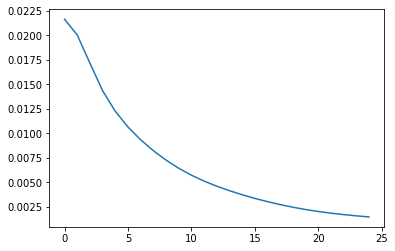

In [12]:
# 줄어드는 손실함수의 시각화
plt.plot(loss_list)
plt.show()